epoch=0, 기울기=0.0000, 절편=0.0000
LR: 0.00020, a_diff: -3143.70, b_diff: -58.10, MSE: 4336.7000000000
---------------------------------------------
epoch=400, 기울기=0.7825, 절편=0.8105
LR: 0.00020, a_diff: 0.15, b_diff: -9.95, MSE: 1821.7597169063
---------------------------------------------
epoch=800, 기울기=0.7703, 절편=1.6040
LR: 0.00020, a_diff: 0.15, b_diff: -9.89, MSE: 1806.0127573784
---------------------------------------------
epoch=1200, 기울기=0.7583, 절편=2.3929
LR: 0.00020, a_diff: 0.15, b_diff: -9.83, MSE: 1790.4524680688
---------------------------------------------
epoch=1600, 기울기=0.7463, 절편=3.1770
LR: 0.00020, a_diff: 0.15, b_diff: -9.77, MSE: 1775.0766361206
---------------------------------------------
epoch=2000, 기울기=0.7344, 절편=3.9565
LR: 0.00020, a_diff: 0.15, b_diff: -9.71, MSE: 1759.8830749087
---------------------------------------------


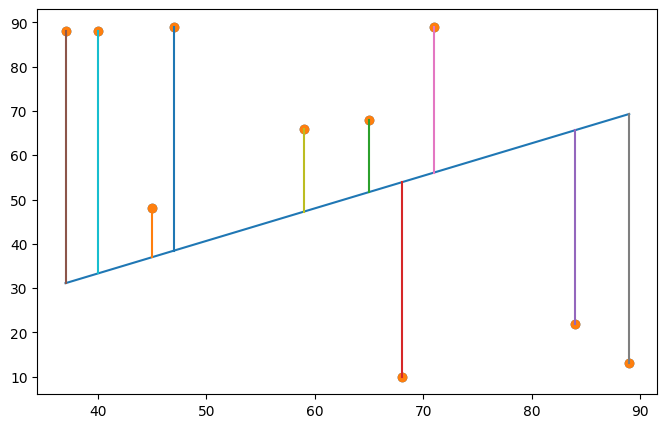

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# y_hat : 예측값, y = 실제값
def mse(y_hat, y):
  return ((y_hat - y) ** 2).mean()

# 공부 시간 X와 성적 Y의 리스트를 만들기
# 1 ~ 99 사이의 임의의 랜덤 정수 값 생성
np.random.seed(0)
data = np.random.randint(1, 99, size=(10, 2)).tolist()

#print("data", data)

x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타내기
plt.figure(figsize = (8, 5))
plt.scatter(x, y)
#plt.show()

# 리스트로 되어 있는 x와 y 값을 넘파이 배열로 바꾸기 (인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 정하기
lr = 0.0002

# 몇 번 반복될지 설정 (0부터 세므로 원하는 반복 횟수에 +1)
epochs = 2001

mse_pre = 0
# 경사 하강법 시작
for i in range(epochs): # 에포크 수만큼 반복
  y_pred = a * x_data + b # y를 구하는 식 세우기
  error = y_data - y_pred # 오차를 구하는 식 (실제값 - 예측값)

  # 예측값, 실제값을 비교하여 mse 구하기
  mse_now = mse(y_pred, y_data)

  # mse_pre를 0으로 초기화 + 해당 라인을 넣어주지 않으면 다른 결과 출력
  if i == 0:
    mse_pre = mse_now

  a_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차 함수를 a로 미분한 값
  b_diff = -(1/len(x_data)) * sum(y_data - y_pred) # 오차 함수를 b로 미분한 값

  if i % 400 == 0:  # 100번 반복될 때마다 현재의 a, b값 출력
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
    print("LR: %.05f, a_diff: %.02f, b_diff: %.02f, MSE: %.10f" % (lr, a_diff, b_diff, mse_now))
    print("----------------------------------------------------------------------")

  a = a - lr * a_diff # 학습률을 곱해 기존의 a값 업데이트
  b = b - lr * b_diff # 학습률을 곱해 기존의 b값 업데이트

  if(mse_pre < mse_now):
    lr = lr - 0.00001

  mse_pre = mse_now

# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.plot([x_data, x_data], [y_data, y_pred])
plt.show()